In [17]:
import tensorflow as tf
from  keras_preprocessing.image import ImageDataGenerator

In [18]:
training_dir = "./dataset/Training/"
validation_dir = "./dataset/Validation/"
input_shape = (224,224,3)

In [19]:
training_data_generator = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, vertical_flip=True, rotation_range=45, height_shift_range=0.2, width_shift_range=0.2, fill_mode="nearest")

validation_data_generator = ImageDataGenerator(rescale=1.0/255)

train_generator = training_data_generator.flow_from_directory(training_dir, target_size=(224, 224), class_mode="categorical", batch_size=64 )

validation_generator = validation_data_generator.flow_from_directory(validation_dir, target_size=(224, 224), class_mode="categorical", batch_size=16 )

Found 980 images belonging to 2 classes.
Found 239 images belonging to 2 classes.


In [20]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, MaxPooling2D, Conv2D
from keras.optimizers import Adam
def fireNet(input_shape):
    model = Sequential([
        Conv2D(96, (11,11), strides=(4,4), activation="relu", input_shape= input_shape),
        MaxPooling2D(pool_size=(3,3), strides=(2,2)),
        
        Conv2D(256, (5,5) , activation="relu"),
        MaxPooling2D(pool_size=(3,3), strides=(2,2)),
         
        Conv2D(512, (5,5) , activation="relu"),
        MaxPooling2D(pool_size=(3,3), strides=(2,2)),
        
        Flatten(),
        Dropout(rate=0.3),
        Dense(2048, activation="relu"),
        Dropout(rate=0.3),

        Dense(1024, activation="relu"),
        Dropout(rate=0.3),

        Dense(2, activation="softmax")


    ])
    model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=1e-4), metrics=["acc"])
    return model

In [21]:
model = fireNet(input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 512)         3277312   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 512)        0

In [22]:
history = model.fit(train_generator, steps_per_epoch=15, epochs=100, validation_data=validation_generator, validation_steps=15)

Epoch 1/100
15/15 [==============================] - 45s 3s/step - loss: 0.5109 - acc: 0.7140 - val_loss: 0.3807 - val_acc: 0.8745
Epoch 2/100
15/15 [==============================] - 33s 2s/step - loss: 0.3796 - acc: 0.8483 - val_loss: 0.4365 - val_acc: 0.8577
Epoch 3/100
15/15 [==============================] - 33s 2s/step - loss: 0.3187 - acc: 0.8745 - val_loss: 0.2563 - val_acc: 0.9205
Epoch 4/100
15/15 [==============================] - 33s 2s/step - loss: 0.2780 - acc: 0.8897 - val_loss: 0.2416 - val_acc: 0.9205
Epoch 5/100
15/15 [==============================] - 33s 2s/step - loss: 0.2354 - acc: 0.9159 - val_loss: 0.3050 - val_acc: 0.8912
Epoch 6/100
15/15 [==============================] - 33s 2s/step - loss: 0.2717 - acc: 0.8854 - val_loss: 0.2200 - val_acc: 0.9331
Epoch 7/100
15/15 [==============================] - 33s 2s/step - loss: 0.2359 - acc: 0.9116 - val_loss: 0.2430 - val_acc: 0.9331
Epoch 8/100
15/15 [==============================] - 33s 2s/step - loss: 0.2512 - a

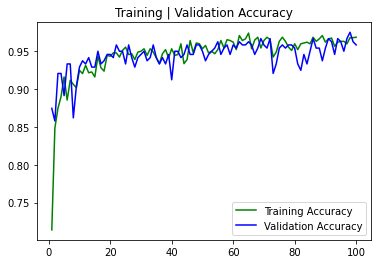

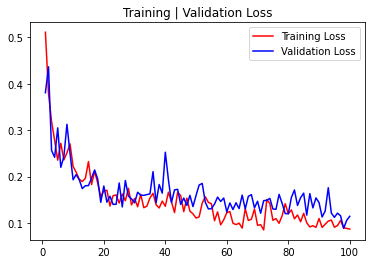

In [26]:
import matplotlib.pyplot as plt
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1,101) 

plt.plot(epochs, acc, "g",label="Training Accuracy")
plt.plot(epochs, val_acc,"b", label="Validation Accuracy")
plt.legend(loc=0)
 
plt.title("Training | Validation Accuracy")
plt.show()

plt.plot(epochs, loss,"r", label="Training Loss")
plt.plot(epochs, val_loss, "b",label="Validation Loss")
plt.legend(loc=0)
 

plt.title("Training | Validation Loss")
plt.show()

In [27]:
model.save("./models/fire_model.h5")

In [28]:
import cv2
import numpy as np
from keras.models import load_model

In [30]:
model = load_model("./models/fire_model.h5")
path = "./test/test.jpg"

In [52]:
test_img = cv2.imread(path)
img = np.asarray(test_img)

img  = cv2.resize(img, (224,224))
img = img/255
img = np.expand_dims(img, axis=0)
print(img.shape)

predict = model.predict(img)
# pred = np.max(predict) or
# pred = max(predict[0])
pred = np.argmax(predict[0]) 
probability = predict[0][pred]    

probability_ = f"%{probability*100:.2f}"

print(predict, pred, probability, probability_)

if pred == 1:
    label = "Fire"
else:
    label = "Neutral"

font = cv2.FONT_HERSHEY_SIMPLEX
color = (0,255,0 )

cv2.putText(test_img, label, (35,60), font, 1, color, 2)
cv2.putText(test_img, probability_, (35,120), font, 1, color, 2)

cv2.imshow("Prediction", test_img)
cv2.waitKey(5000)
cv2.destroyAllWindows()

(1, 224, 224, 3)
1/1 [==============================] - 0s 22ms/step
[[0.01330289 0.98669714]] 1 0.98669714 %98.67


In [53]:
path = "./test/test.jpeg"
test_img = cv2.imread(path)
img = np.asarray(test_img)

img  = cv2.resize(img, (224,224))
img = img/255
img = np.expand_dims(img, axis=0)
print(img.shape)

predict = model.predict(img)
# pred = np.max(predict) or
# pred = max(predict[0])
pred = np.argmax(predict[0]) 
probability = predict[0][pred]    

probability_ = f"%{probability*100:.2f}"

print(predict, pred, probability, probability_)

if pred == 1:
    label = "Fire"
else:
    label = "Neutral"

font = cv2.FONT_HERSHEY_SIMPLEX
color = (0,255,0 )

cv2.putText(test_img, label, (35,60), font, 1, color, 2)
cv2.putText(test_img, probability_, (35,120), font, 1, color, 2)

cv2.imshow("Prediction", test_img)
cv2.waitKey(5000)
cv2.destroyAllWindows()

(1, 224, 224, 3)
1/1 [==============================] - 0s 21ms/step
[[3.8261282e-05 9.9996173e-01]] 1 0.99996173 %100.00


In [ ]:
test_img = cv2.imread(path)
img = np.asarray(test_img)

img  = cv2.resize(img, (224,224))
img = img/255
img = np.expand_dims(img, axis=0)
print(img.shape)

predict = model.predict(img)
# pred = np.max(predict) or
# pred = max(predict[0])
pred = np.argmax(predict[0]) 
probability = predict[0][pred]    

probability_ = f"%{probability*100:.2f}"

print(predict, pred, probability, probability_)

if pred == 1:
    label = "Fire"
else:
    label = "Neutral"

font = cv2.FONT_HERSHEY_SIMPLEX
color = (0,255,0 )

cv2.putText(test_img, label, (35,60), font, 1, color, 2)
cv2.putText(test_img, probability_, (35,120), font, 1, color, 2)

cv2.imshow("Prediction", test_img)
cv2.waitKey(5000)
cv2.destroyAllWindows()

In [54]:
video_path = "test/test.mp4"
cap = cv2.VideoCapture(video_path)

while True:
    ret, frame = cap.read()
    if ret == 0:
        break
    img = np.asarray(frame)
    img = cv2.resize(img, (224,224))

    img = img/255

    img = img.reshape(1,224,224,3)
    predictions = model.predict(img)
    pred = np.argmax(predictions[0])

    probability = predictions[0][pred]
    probability_ = f"%{probability*100:.2f}"

    if pred == 1:
        label = "Fire"
        color = (0,0,255)
    else:
        label = "Neutral"
        color = (0,255,0)

    font = cv2.FONT_HERSHEY_SIMPLEX
    
    cv2.putText(frame, label, (35,60), font, 1, color, 2)
    cv2.putText(frame, probability_, (35,120), font, 1, color, 2)

    cv2.imshow("Camera 001", frame)
    if cv2.waitKey(10) & 0xFF == ord("q"):
        break
cap.release()
cv2.destroyAllWindows()    

1/1 [==============================] - 0s 18ms/step
